## Задача 1
Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1))

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def dot_matrices_with_vectors(n, p):
    matrices = np.loadtxt('matrices_1.txt', delimiter=',').reshape(p, n, n)
    vectors = np.loadtxt('vectors_1.txt', delimiter=',').reshape(p, n, 1)

    result = np.zeros((len(vectors[0]), 1))
    for i in range(len(matrices)):
        result += np.dot(matrices[i], vectors[i])

    print(result)
    np.savetxt('answer_1.txt', result, delimiter=',')

dot_matrices_with_vectors(3,3)
# сделать ввод из файла

[[259.]
 [201.]
 [293.]]


## Задача 2
Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.

In [30]:
def binary_representation(n):
    vector = np.loadtxt('vector_2.txt', delimiter=',', dtype = 'uint8')
    # print(*vector)

    binary_arr = np.unpackbits(vector[:, np.newaxis], axis=1)

    print(binary_arr)
    np.savetxt('answer_2.txt', binary_arr, fmt='%d')

binary_representation(8)
# сделать ввод из файла

[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0]]


## Задача 3
Написать функцию, которая возвращает все уникальные строки матрицы

In [31]:
def unique_rows(n, m):
    matrices = np.loadtxt('matrices_3.txt', delimiter=',').reshape(n, m)
    uniques = np.unique(matrices, axis=0)
    print(uniques)
    np.savetxt('answer_3.txt', uniques, fmt='%d')

unique_rows(8, 3)
# сделать ввод из файла

[[ 1.  2.  3.]
 [ 3.  4.  3.]
 [23.  5.  3.]
 [76.  4.  3.]]


## Задача 4
Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[-0.76156162  1.43091268  0.10171917 -0.09420869  2.31457978  1.37156017
   0.1137566   1.9203643 ]
 [-2.04734851  0.046603   -1.60068351 -0.43491582  1.24816118  0.74094902
  -0.20535816  1.62817178]]

Мат. ожидание столбцов:  [-1.40445507  0.73875784 -0.74948217 -0.26456225  1.78137048  1.0562546
 -0.04580078  1.77426804]

Дисперсия столбцов:  [0.41331198 0.47907833 0.72454372 0.02902034 0.28431215 0.09941761
 0.02545856 0.02134412]


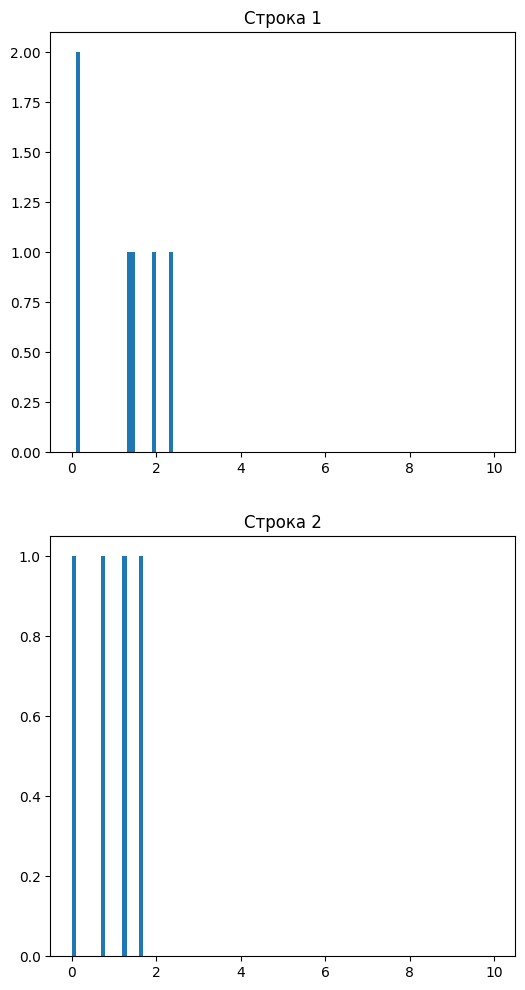

In [32]:
def matrix_operations_4(m,n):
    matrix = np.random.normal(loc = 0, scale = 1, size = (m*n, )).reshape((m,n))
    print(matrix)
    mat_ozhid = np.mean(matrix, axis = 0) 
    disp = np.var(matrix, axis = 0)
    print(f'\nМат. ожидание столбцов: ', mat_ozhid)
    print(f'\nДисперсия столбцов: ', disp)
    
    fig, axs = plt.subplots(nrows=matrix.shape[0], ncols=1, figsize=(6, 12))

    # Перебираем строки матрицы и строим гистограмму для каждой строки
    for i, row in enumerate(matrix):
        axs[i].hist(row, bins=100, range=(0, 10))
        axs[i].set_title("Строка {}".format(i+1))

    # Выводим графики на экран
    plt.savefig('graph_4.png')
    plt.show()

    with open('answer_4.txt', 'w') as f:
        # Записываем строку в файл
        f.write(f'\nMean of rows: {mat_ozhid}')
        f.write(f'\nDispersion of rows: {disp}')
    
f = np.loadtxt('sizes_4.txt')   
matrix_operations_4(int(f[0]), int(f[1]))

## Задача 5
Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.

In [33]:
def chess_matrix(m,n,a,b):
    mat = np.loadtxt('matrix_5.txt', delimiter=',').reshape(m, n)

    for i in range(m):
        for j in range(n):
            mat[i][j] = a if (i+j)%2==0 else b

    print(mat)

chess_matrix(5,6,1,2)
# сделать ввод из файла

[[1. 2. 1. 2. 1. 2.]
 [2. 1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1. 2.]
 [2. 1. 2. 1. 2. 1.]
 [1. 2. 1. 2. 1. 2.]]


## Задача 6
Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

In [34]:
def create_circle_tensor(radius, color):
    tensor = np.zeros((2*radius, 2*radius, 3), dtype=np.float32)
    
    # Вычисляем координаты центра круга
    center_x, center_y = radius, radius
    
    # Создаем координатные сетки
    x, y = np.meshgrid(np.arange(2*radius), np.arange(2*radius))
    
    # Создаем маску круга
    mask = ((x - center_x)**2 + (y - center_y)**2 <= radius**2)
    
    # Заполняем тензор значениями цвета внутри круга
    tensor[mask] = color
    
    return tensor


f_6 = np.loadtxt('data_6.txt')
print(f_6[0])
tensor = create_circle_tensor(int(f_6[0]), np.array([f_6[1], f_6[2], f_6[3]], dtype=np.float32))
np.savetxt('tensor_6.txt', tensor.reshape(-1, 3), delimiter=',')

# Выводим тензор на экран
print(tensor)

5.0
[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 1. 10.  1.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]]

 [[ 0.  0.  0.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]]

 [[ 0.  0.  0.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]]

 [[ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]
  [ 1. 10.  1.]]

 [[ 0.  0.  0.]
  [ 1. 1

## Задача 7
Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

In [35]:
def standardize_tensor(tensor):
    mean = np.mean(tensor)
    std = np.std(tensor)

    res = (tensor - mean)/std

    print(res)

    np.savetxt('out_tensor_7.txt', res, delimiter=',')
    

tensor_7 = np.loadtxt('in_tensor_7.txt', delimiter=',')
tensor_7

standardize_tensor(tensor_7)

[[-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.76925958 -0.76925958 -0.76925958]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618 -0.525823  ]
 [-0.525823    1.66510618

## Задача 8
Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

In [36]:
def part_of_matrix(matrix, center, size, fill=0):
    # Вычисляем координаты верхнего левого угла подматрицы
    x, y = center[0] - size // 2, center[1] - size // 2
    
    # Создаем пустую подматрицу заданного размера
    submatrix = np.full((size, size), fill)
    
    # Вычисляем границы подматрицы в исходной матрице
    x_min, x_max = max(0, x), min(matrix.shape[0], x + size)
    y_min, y_max = max(0, y), min(matrix.shape[1], y + size)
    
    # Копируем соответствующую часть исходной матрицы в подматрицу
    submatrix[x_min - x:x_max - x, y_min - y:y_max - y] = matrix[x_min:x_max, y_min:y_max]
    
    print(submatrix)



f_8 = np.loadtxt('matrix_sizes_8.txt', delimiter = ',')
matrix_8 = np.loadtxt('matrix_8.txt', delimiter=',').reshape(int(f_8[0]),int(f_8[1]))
f_8_params = np.loadtxt('func_params_8.txt', delimiter=',')
center = (int(f_8_params[0]), int(f_8_params[1]))
size = int(f_8_params[2])
fill = int(f_8_params[3])

part_of_matrix(matrix_8, center, size, fill)

[[2 2 4 0]
 [3 1 5 0]
 [4 8 2 0]
 [2 9 0 0]]


## Задача 9
Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений

In [37]:
def most_met_numbers(matrix, n, m):
    res = np.array([])
    for i in range(n):
        dict = {}
        for j in range(m):
            if matrix[i][j] not in dict:
                dict[matrix[i][j]] = 1
            else:
                dict[matrix[i][j]] += 1
        print(max(dict, key = dict.get))
        res = np.append(res, max(dict, key = dict.get))

    print(res)


f_9 = np.loadtxt('matrix_size_9.txt', delimiter = ',')
n, m = int(f_9[0]), int(f_9[1])
matrix_9 = np.loadtxt('matrix_9.txt', delimiter=',').reshape(n, m)

most_met_numbers(matrix_9, n, m)

4.0
1.0
2.0
9.0
[4. 1. 2. 9.]


## Задача 10
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [38]:

arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
np.savetxt('in_3d_matrix_10.txt', arr.flatten())

In [40]:
def combine_channels(image, weights):
    weighted_channels = image * weights
    combined_image = np.sum(weighted_channels, axis=2)
    print(combined_image)


f_10 =  np.loadtxt('size_10.txt')
n, m, p = int(f_10[0]), int(f_10[1]), int(f_10[2])

image = np.loadtxt('in_3d_matrix_10.txt', delimiter = ',').reshape(n, m, p)
weights = np.loadtxt('weights_10.txt', delimiter=',')

combine_channels(image, weights)

[[ 1.9  4.9]
 [ 7.9 10.9]]
